In [463]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import functools
from functools import partial
import scipy.integrate as integrate
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [898]:
class Gumbel:
    def __init__(self, theta, Law_RS, Law_RF):
        self.theta = theta     # Dependence Parameter
        self.Law_RS = Law_RS   # Marginal Distribution of Spot
        self.Law_RF = Law_RS   # Marginal Distribution of Future
        
    def phi(self, t):
        return (-np.log(t))**self.theta
    
    def phi_inverse(self, t):
        return np.exp(-(t**(1/self.theta)))
    
    def d_phi(self, t):
        return self.phi(t)/(t*np.log(t))
    
    def d_phi_inverse(self, t):
        A = -1/self.theta
        B = t**((1/self.theta)-1)
        C = self.phi_inverse(t)
        return A*B*C
    
    def H(self, w, h, r_h): # a helper function to compute the input to F_RF
        A = self.Law_RS.ppf(w) - r_h
        if h!=0:
            B = h
        else:
            B = 0.00001
        return A/B
    
    def g(self, w, h, r_h):
        return self.Law_RF.cdf(self.H(w=w, h=h, r_h=r_h))
    
    def dg_dw(self, w, h, r_h):
        A = self.Law_RF.pdf(self.H(w=w, h=h, r_h=r_h))
        if h !=0:
            B = (1/h)*(1/self.Law_RS.pdf(self.Law_RS.ppf(w)))
        else:
            h = 0.00001
            B = (1/h)*(1/self.Law_RS.pdf(self.Law_RS.ppf(w)))
        return A*B
    
    def D1C(self, w, h, r_h):
        a = self.phi(w)+self.phi(self.g(w,h,r_h))
        A = self.d_phi_inverse(a)
        B = self.d_phi(w)
        C = self.d_phi(self.g(w,h,r_h))
        D = self.dg_dw(w, h, r_h)
        return A*(B+(C*D))
    
    def F_RH(self, h, r_h):
        func = partial(self.D1C, h=h, r_h=r_h)
        I = 
        
        I = integrate.quad(lambda w: self.D1C(w=w, h=h, r_h=r_h), 0.0001, 0.999)
        return 1 - I[0]

In [926]:
result = []
for i in np.linspace(-3,3,10):
    func = partial(c.D1C, h=h, r_h=i)
    result.append(round(integrate.quad(func, 0,1)[0], 5))

In [927]:
result

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

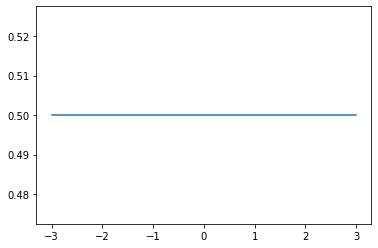

In [928]:
plt.plot(np.linspace(-3,3,10),result)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in true_divide

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning:

invalid value encountered in greater

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning:

invalid value encountered in less

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning:

invalid value encountered in greater_equal

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:874: RuntimeWarning:

invalid value encountered in greater_equal

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:874: RuntimeWarning:

invalid value encountered in less_equal



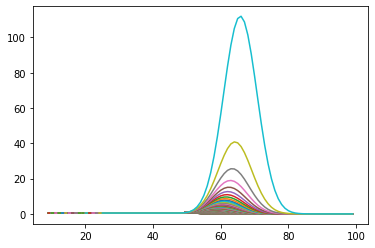

In [889]:
w = 0
h=1
r_h =np.linspace(-10,10,100)

for d in np.linspace(0,1,1000):
    plt.plot(c.D1C(w=w+d, h=h, r_h=r_h))
# plt.plot(c.D1C(w=w+0.1, h=h, r_h=r_h))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in true_divide



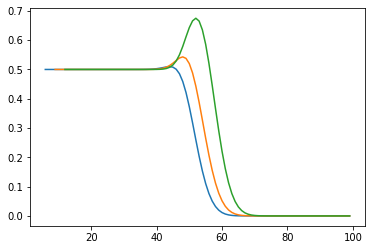

In [897]:
plt.plot(c.D1C(w=0.25, h=h, r_h=r_h))
plt.plot(c.D1C(w=0.50, h=h, r_h=r_h))
plt.plot(c.D1C(w=0.75, h=h, r_h=r_h))

In [899]:
c = Gumbel(theta  = 2.5,
           Law_RS = stats.norm(loc=0, scale=1),
           Law_RF = stats.norm(loc=0, scale=1))

In [900]:
c = Gumbel(theta  = 2, # tau = 0.5, meaning 50% chance of coordance
           Law_RS = stats.norm(loc=0, scale=1),
           Law_RF = stats.norm(loc=0, scale=1))

x  = np.linspace(-10,10,100)
y  = [c.F_RH(h=1.2, r_h=i) for i in x]
print("y is done")

# y1 = [c.F_RH(h=1.1, r_h=i) for i in x]
# print("y1 is done")

y2 = [c.F_RH(h=1.0, r_h=i) for i in x]
print("y2 is done")

# y3 = [c.F_RH(h=0.9, r_h=i) for i in x]
# print("y3 is done")

# y4 = [c.F_RH(h=0.8, r_h=i) for i in x]
# print("y4 is done")

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in double_scalars

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: IntegrationWarning:

The integral is probably divergent, or slowly convergent.



y is done
y2 is done


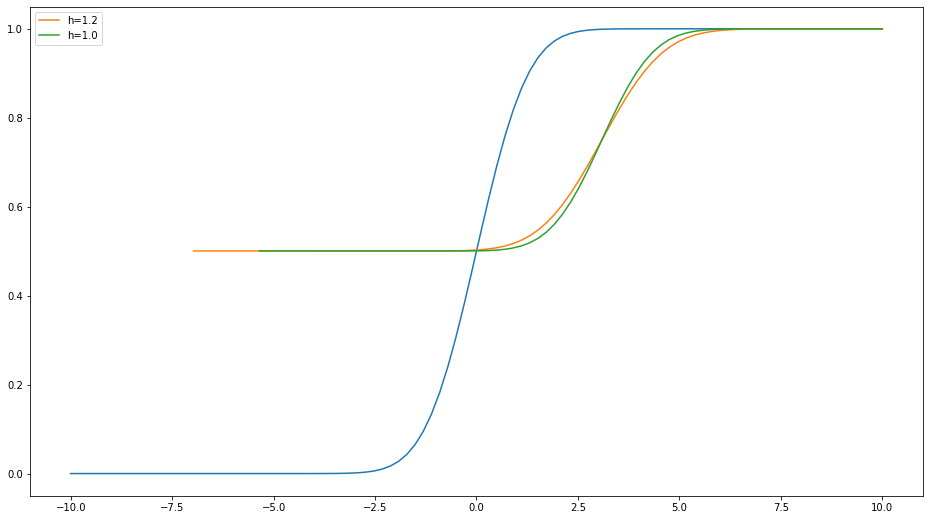

In [901]:
plt.figure(figsize=(16,9))
plt.plot(x,stats.norm(loc=0, scale=1).cdf(x))
plt.plot(x,y , label="h=1.2")
# plt.plot(x,y1, label="h=1.1")
plt.plot(x,y2, label="h=1.0")
# plt.plot(x,y3, label="h=0.9")
# plt.plot(x,y4, label="h=0.8")
# plt.plot(x,y5, label="h=10")
plt.legend()

In [833]:
c = Gumbel(theta  = 1, # tau = 0.5, meaning 50% chance of coordance
           Law_RS = stats.norm(loc=0, scale=1),
           Law_RF = stats.norm(loc=0, scale=1))

x  = np.linspace(-10,10,100)
y  = [c.F_RH(h=1.2, r_h=i) for i in x]
y2  = [c.F_RH(h=1, r_h=i) for i in x]



/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in double_scalars

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: IntegrationWarning:

The integral is probably divergent, or slowly convergent.



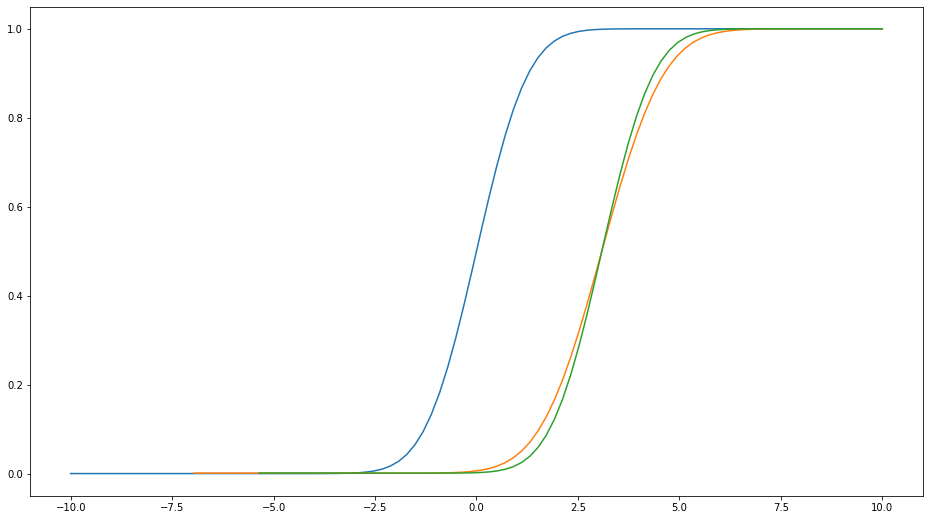

In [834]:
plt.figure(figsize=(16,9))
plt.plot(x,stats.norm(loc=0, scale=1).cdf(x))
plt.plot(x,y  , label="h=1.2")
plt.plot(x,y2 , label="h=1.0")

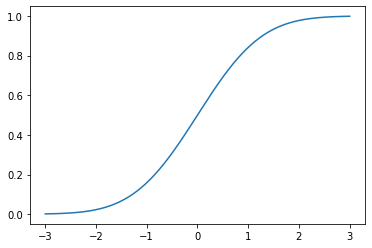

In [47]:
x=np.linspace(-3,3, 500)
plt.plot(x,stats.norm(loc=0, scale=1).cdf(x))

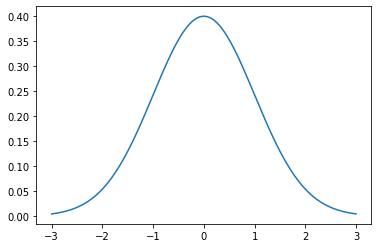

In [48]:
x=np.linspace(-3,3, 500)
plt.plot(x,stats.norm(loc=0, scale=1).pdf(x))

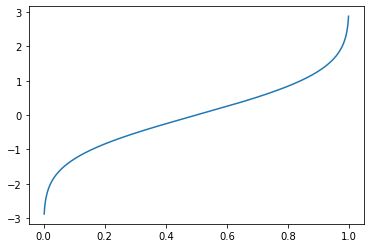

In [49]:
q = np.linspace(0,1, 500)
plt.plot(q,stats.norm(loc=0, scale=1).ppf(q))

In [355]:
integrate.quad(lambda x:stats.norm(loc=0, scale=1).pdf(x), -100,100)

(1.0000000000000002, 1.0346447361664605e-12)

In [786]:
X = np.random.normal(0,1, 100000)
Y = np.random.normal(0,1, 100000)
Z = X+Y

In [787]:
P_X  = np.mean(X<=0.5)
P_Y  = np.mean(Y<=0.25)
P_XY = np.mean((X<=0.5) & (Y<=0.25))
P_XYc = np.mean((X<=0.5) & (Y>0.25))
P_XY + P_XYc == P_X

True

In [826]:
h=-0.2
Z = X+h*Y
u = 0.75
v = 0.5
w = -0.1
P_X  = np.mean(X<=u)
P_Y  = np.mean(Y<=v)
P_Z  = np.mean(Z<=w)
P_Zc = np.mean(Z>w)
P_XZ = np.mean((X<=u) & (Z<=w))
P_XZc = np.mean((X<=u) & (Z>w))

In [827]:
P_XZ + P_XZc 

0.7719499999999999

In [828]:
P_X

0.77195

In [829]:
d=0.1
P_Xz = np.mean((X<=u) & (Z<=w+d)& (Z>w))
P_Xz

0.03824

In [728]:
import itertools
X = np.linspace(-5,5, 60)
Y = np.linspace(-5,5, 60)
XY = np.array(list(itertools.product(X, Y))) # all possible combination of X and Y
Z = X+Y

In [742]:
data = np.zeros((len(XY), 3))
data[:,:2] = XY
data[:,2]  = XY.sum(axis=1)
data = pd.DataFrame(data)
data.columns = ["X","Y", "Z"]
data = data.pivot(index="X", columns ="Y", values="Z")
x = list(data.index)
y = list(data.columns)
z = data.values
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
# fig.update_xaxes(autorange="reversed")
fig.update_yaxes(autorange="reversed")
# fig.show()

In [807]:
h = 0.5
data = np.zeros((len(XY), 3))
data[:,:2] = XY
data[:,2]  = XY[:,0] + h* XY[:,1]
data = pd.DataFrame(data)
data.columns = ["X","Y", "Z"]
data = data.pivot(index="X", columns ="Y", values="Z")
x = list(data.index)
y = list(data.columns)
z = data.values

In [808]:
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
# fig.update_scenes(yaxis_autorange="reversed")
fig.update_scenes(yaxis_autorange="reversed", xaxis_autorange="reversed")
# fig.show()

In [809]:
h = 1.5
data = np.zeros((len(XY), 3))
data[:,:2] = XY
data[:,2]  = XY[:,0] + h* XY[:,1]
data = pd.DataFrame(data)
data.columns = ["X","Y", "Z"]
data = data.pivot(index="X", columns ="Y", values="Z")
x = list(data.index)
y = list(data.columns)
z = data.values
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
# fig.update_scenes(yaxis_autorange="reversed")
fig.update_scenes(yaxis_autorange="reversed", xaxis_autorange="reversed")
# fig.show()

In [838]:
class Frank:
    def __init__(self, theta, Law_RS, Law_RF):
        self.theta = theta     # Dependence Parameter
        self.Law_RS = Law_RS   # Marginal Distribution of Spot
        self.Law_RF = Law_RS   # Marginal Distribution of Future
        
    def phi(self, t):
        A = np.exp(-self.theta * t) - 1
        B = np.exp(-self.theta)     - 1
        return -np.log(A/B)
    
    def phi_inverse(self, t):
        A = -1/self.theta
        B = 1 + (np.exp(-t)*(np.exp(-self.theta)-1))
        return A*np.log(B)
    
    def d_phi(self, t):
        A = self.theta * np.exp(-self.theta * t)
        B = np.exp(-self.theta * t) - 1
        return A/B
    
    def d_phi_inverse(self, t):
        A = -np.exp(-t)
        B = self.theta * (1+np.exp(-t))
        return A/B
    
    def H(self, w, h, r_h): # a helper function to compute the input to F_RF
        A = self.Law_RS.ppf(w) - r_h
        if h!=0:
            B = h
        else:
            B = 0.00001
        return A/B
    
    def g(self, w, h, r_h):
        return self.Law_RF.cdf(self.H(w, h, r_h))
    
    def dg_dw(self, w, h, r_h):
        A = self.Law_RF.pdf(self.H(w, h, r_h))
        if h !=0:
            B = (1/h)*(1/self.Law_RS.pdf(self.Law_RS.ppf(w)))
        else:
            h = 0.00001
            B = (1/h)*(1/self.Law_RS.pdf(self.Law_RS.ppf(w)))
        return A*B
    
    def D1C(self, w, h, r_h):
        a = self.phi(w)+self.phi(self.g(w,h,r_h))
        A = self.d_phi_inverse(a)
        B = self.d_phi(w)
        C = self.d_phi(self.g(w,h,r_h))
        D = self.dg_dw(w, h, r_h)
        return A*(B+(C*D))
    
    def F_RH(self, h, r_h):
        I = integrate.quad(lambda w: self.D1C(w, h, r_h), 0.0001, 0.999)
        return 1 - I[0]

In [839]:
c = Frank(theta  = 1, # tau = 0.5, meaning 50% chance of coordance
           Law_RS = stats.norm(loc=0, scale=1),
           Law_RF = stats.norm(loc=0, scale=1))

In [840]:
x  = np.linspace(-10,10,100)
y  = [c.F_RH(h=1.2, r_h=i) for i in x]
print("y is done")

y2 = [c.F_RH(h=1.0, r_h=i) for i in x]
print("y2 is done")


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in log

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning:

invalid value encountered in double_scalars

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local

y is done
y2 is done


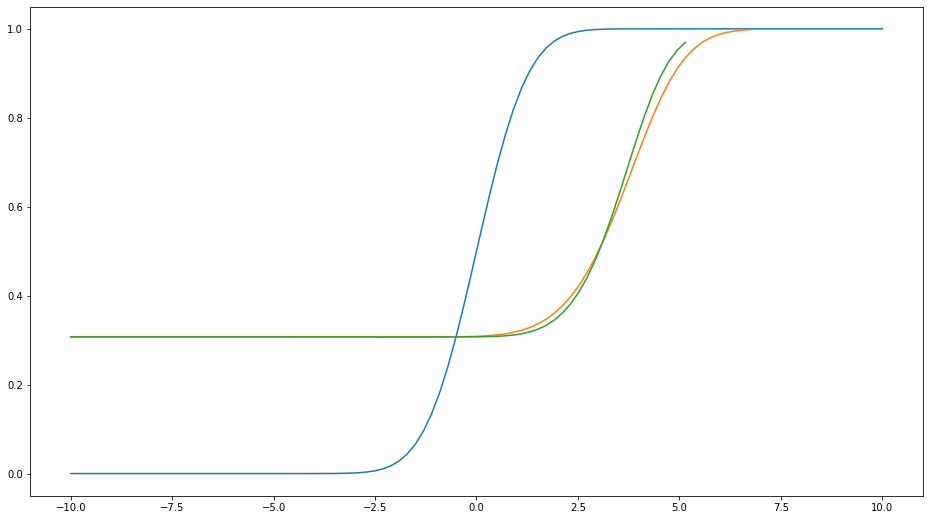

In [841]:
plt.figure(figsize=(16,9))
plt.plot(x,stats.norm(loc=0, scale=1).cdf(x))
plt.plot(x,y  , label="h=1.2")
plt.plot(x,y2 , label="h=1.0")

In [864]:
class Gumbel:
    def __init__(self, theta, Law_RS, Law_RF):
        self.theta = theta     # Dependence Parameter
        self.Law_RS = Law_RS   # Marginal Distribution of Spot
        self.Law_RF = Law_RS   # Marginal Distribution of Future
        
    def phi(self, t):
        return (-np.log(t))**self.theta
    
    def phi_inverse(self, t):
        return np.exp(-(t**(1/self.theta)))
    
    def d_phi(self, t):
        return self.phi(t)/(t*np.log(t))
    
    def d_phi_inverse(self, t):
        A = -1/self.theta
        B = t**((1/self.theta)-1)
        C = self.phi_inverse(t)
        return A*B*C
    
    def H(self, w, r_h, h):
        return (self.Law_RS.ppf(w)-r_h)/h
    
    def dH_dw(self, w, h):
        A =1/h
        B = self.Law_RS.pdf(self.Law_RS.ppf(w))
        return A*(1/B)
    
    def D1C(self, w, r_h, h):
        inner = self.phi(w)+self.phi(
                                self.Law_RF.cdf(
                                    self.H(w, r_h, h)))

        A = self.d_phi_inverse(inner)
        
        B = self.d_phi(w)
        
        C = self.d_phi(self.Law_RF.cdf(
                            self.H(w,r_h,h)))
        
        D = self.Law_RF.pdf(self.H(w,r_h,h))
        
        E = self.dH_dw(w, h)
        
        return A*(B+(C*D*E))
        
    def F_RH(self, h, r_h):
        I = integrate.quad(lambda w: self.D1C(w, h, r_h), 0.0001, 0.999)
        return 1 - I[0]

In [865]:
c = Gumbel(theta  = 1, # tau = 0.5, meaning 50% chance of coordance
           Law_RS = stats.norm(loc=0, scale=1),
           Law_RF = stats.norm(loc=0, scale=1))

In [866]:
x  = np.linspace(-10,10,100)
y  = [c.F_RH(h=1, r_h=i) for i in x]
print("y is done")

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in double_scalars

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in log

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log



y is done


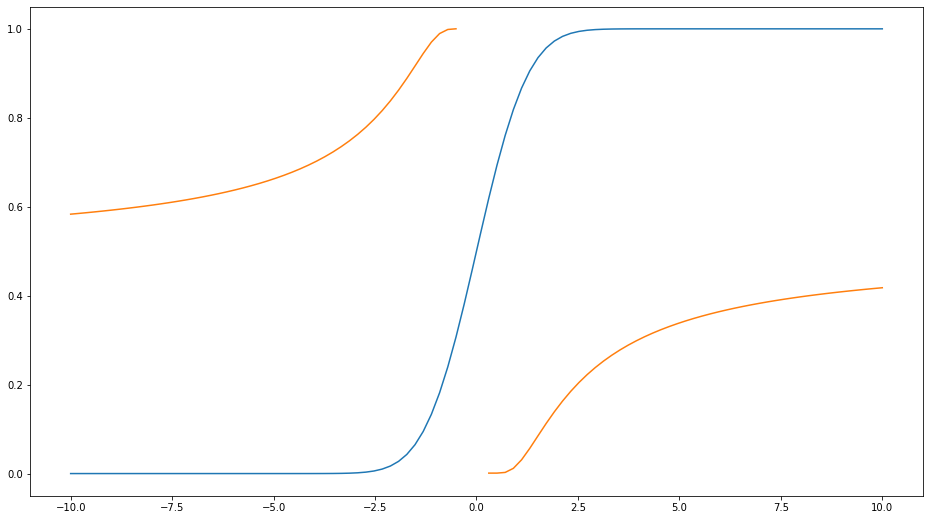

In [867]:
plt.figure(figsize=(16,9))
plt.plot(x,stats.norm(loc=0, scale=1).cdf(x))
plt.plot(x,y  , label="h=1")

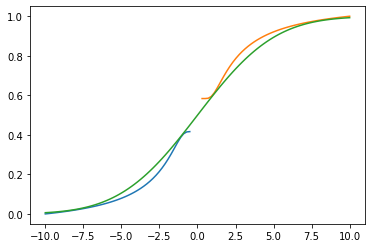

In [877]:
plt.plot(x[0:50], np.array(y[0:50])-y[0])
plt.plot(x[50:], np.array(y[50:])+y[0])
plt.plot(x,stats.norm(loc=0, scale=4).cdf(x))


In [861]:
class Frank:
    def __init__(self, theta, Law_RS, Law_RF):
        self.theta = theta     # Dependence Parameter
        self.Law_RS = Law_RS   # Marginal Distribution of Spot
        self.Law_RF = Law_RS   # Marginal Distribution of Future
        
    def phi(self, t):
        A = np.exp(-self.theta * t) - 1
        B = np.exp(-self.theta)     - 1
        return -np.log(A/B)
    
    def phi_inverse(self, t):
        A = -1/self.theta
        B = 1 + (np.exp(-t)*(np.exp(-self.theta)-1))
        return A*np.log(B)
    
    def d_phi(self, t):
        A = self.theta * np.exp(-self.theta * t)
        B = np.exp(-self.theta * t) - 1
        return A/B
    
    def d_phi_inverse(self, t):
        A = -np.exp(-t)
        B = self.theta * (1+np.exp(-t))
        return A/B
    
    def H(self, w, h, r_h): # a helper function to compute the input to F_RF
        A = self.Law_RS.ppf(w) - r_h
        if h!=0:
            B = h
        else:
            B = 0.00001
        return A/B
    
    def H(self, w, r_h, h):
        return (self.Law_RS.ppf(w)-r_h)/h
    
    def dH_dw(self, w, h):
        A =1/h
        B = self.Law_RS.pdf(self.Law_RS.ppf(w))
        return A*(1/B)
    
    def D1C(self, w, r_h, h):
        inner = self.phi(w)+self.phi(
                                self.Law_RF.cdf(
                                    self.H(w, r_h, h)))

        A = self.d_phi_inverse(inner)
        
        B = self.d_phi(w)
        
        C = self.d_phi(self.Law_RF.cdf(
                            self.H(w, r_h, h)))
        
        D = self.Law_RF.pdf(self.H(w, r_h ,h))
        
        E = self.dH_dw(w, h)
        
        return A*(B+(C*D*E))
        
    
    def F_RH(self, h, r_h):
        I = integrate.quad(lambda w: self.D1C(w, h, r_h), 0.0001, 0.999)
        return 1 - I[0]

In [862]:
c = Frank(theta  = 1, # tau = 0.5, meaning 50% chance of coordance
           Law_RS = stats.norm(loc=0, scale=1),
           Law_RF = stats.norm(loc=0, scale=1))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in log

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning:

invalid value encountered in double_scalars

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



y is done


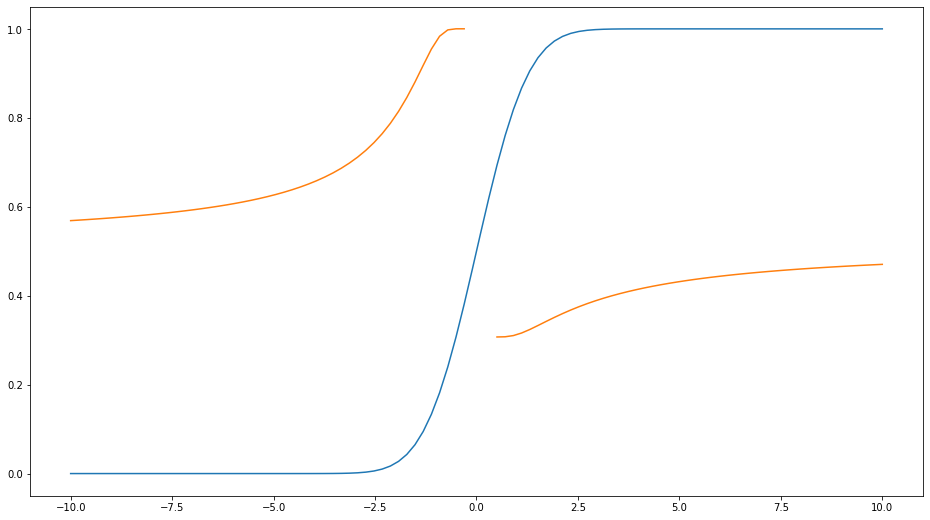

In [863]:
x  = np.linspace(-10,10,100)
y  = [c.F_RH(h=1, r_h=i) for i in x]
print("y is done")
plt.figure(figsize=(16,9))
plt.plot(x,stats.norm(loc=0, scale=1).cdf(x))
plt.plot(x,y  , label="h=1")